In [1]:
%matplotlib inline
import funcy as fy
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython as ip
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(7.2, 5.76))
mpl.rc('font', family='Noto Sans CJK TC')
plt.rc('lines', markeredgecolor='white', markeredgewidth=0.75)
plt.rc('patch', edgecolor='white', force_edgecolor=True, linewidth=1)
ip.display.set_matplotlib_formats('svg')

In [3]:
m = sm.datasets.anes96
df = m.load_pandas().data
df_raw = df

In [4]:
df = df_raw
df = df.iloc[:, :-2]
display(df)
df_sub = df

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income
0,0.0,7.0,7.0,1.0,6.0,6.0,36.0,3.0,1.0
1,190.0,1.0,3.0,3.0,5.0,1.0,20.0,4.0,1.0
2,31.0,7.0,2.0,2.0,6.0,1.0,24.0,6.0,1.0
3,83.0,4.0,3.0,4.0,5.0,1.0,28.0,6.0,1.0
4,640.0,7.0,5.0,6.0,4.0,0.0,68.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...
939,0.0,7.0,7.0,1.0,6.0,4.0,73.0,6.0,24.0
940,0.0,7.0,5.0,2.0,6.0,6.0,50.0,6.0,24.0
941,0.0,3.0,6.0,2.0,7.0,5.0,43.0,6.0,24.0
942,0.0,6.0,6.0,2.0,5.0,6.0,46.0,7.0,24.0


,comp_0,comp_1
0,-0.018755,-0.063110
1,0.039495,0.024617
2,0.028254,0.029594
3,0.041842,0.022166
4,0.065219,-0.033537
...,...,...
939,-0.052474,-0.038008
940,-0.046353,-0.011016
941,-0.055800,0.006478
942,-0.052773,-0.012858


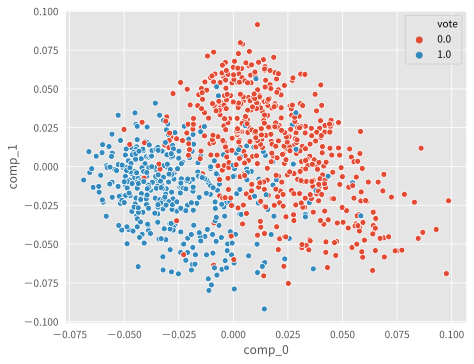

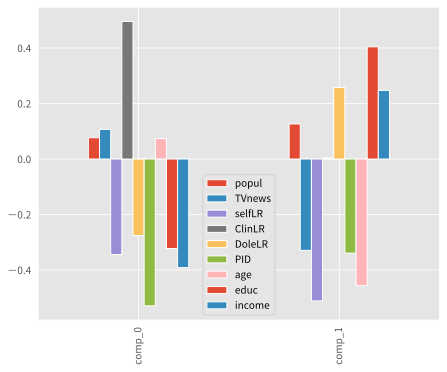

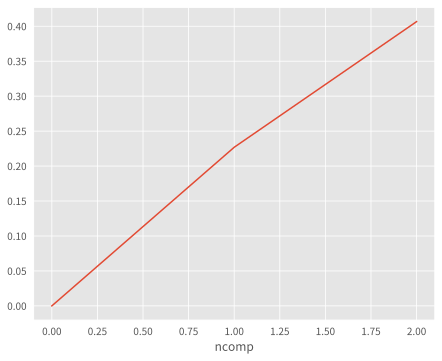

In [5]:
df = df_sub
pc = sm.PCA(df, ncomp=2)
factors = pc.factors
display(factors)

sns.scatterplot(data=factors,
                x='comp_0',
                y='comp_1',
                hue=df_raw.vote)
plt.show()

pc.loadings.T.plot.bar()
plt.show()

pc.rsquare.plot()
plt.show()

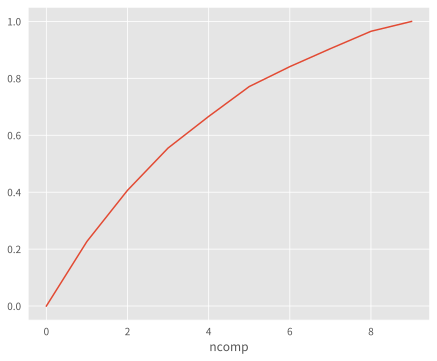

In [6]:
df = df_sub
pc = sm.PCA(df)
pc.rsquare.plot()

In [7]:
from sklearn import preprocessing
from sklearn import decomposition

array([[-0.82341388,  2.46611793],
       [ 1.73402746, -0.96195845],
       [ 1.2404773 , -1.15640226],
       ...,
       [-2.44989938, -0.25314309],
       [-2.31698739,  0.50242414],
       [-1.24808924, -0.32195131]])

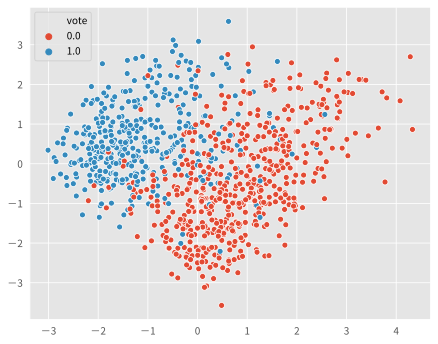

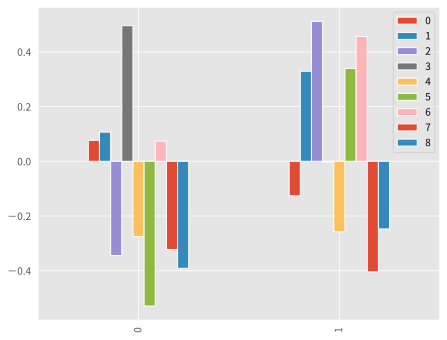

In [8]:
df = df_sub
df = preprocessing.scale(df)
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(df)
display(X)

sns.scatterplot(x=X[:, 0],
                y=X[:, 1],
                hue=df_raw.vote)
plt.show()

pd.DataFrame(pca.components_).plot.bar()

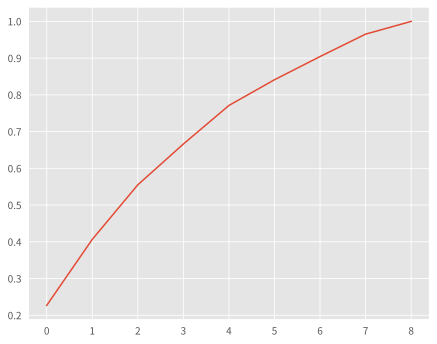

In [9]:
df = df_sub
df = preprocessing.scale(df)
pca = decomposition.PCA()
pca.fit(df)
plt.plot(pca.explained_variance_ratio_.cumsum())